In [2]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler

In [3]:
#Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
#Function to preprocess images
def image_preprocessing(images):
    images = images.reshape(images.shape[0], -1)  
    images = images.astype(np.float32) / 255.0
    return images

In [5]:
#Preprocess images using the image_processing function
x_train = image_preprocessing(x_train)
x_test = image_preprocessing(x_test)

In [6]:
#Data split into train and test
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [7]:
#Data scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)


In [8]:
#Implementing classifiers
classifiers = {
    "SVM": SVC(C=0.1, kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10),
    "KNN": KNeighborsClassifier(n_neighbors=7)
}

output = []

In [9]:
#Train and evaluate each classifier
for name, model in classifiers.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_val, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_val, y_pred, average='weighted')
    output.append([name, accuracy, precision, recall, f1])
    print(f"{name} Classification Report:\n", classification_report(y_val, y_pred))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1175
           1       0.97      0.97      0.97      1322
           2       0.79      0.94      0.86      1174
           3       0.94      0.89      0.91      1219
           4       0.94      0.94      0.94      1176
           5       0.93      0.92      0.92      1104
           6       0.96      0.94      0.95      1177
           7       0.93      0.93      0.93      1299
           8       0.93      0.89      0.91      1160
           9       0.94      0.90      0.92      1194

    accuracy                           0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.93      0.93      0.93     12000

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1175
           1       0.96      0.98      0.97      1322
           2

In [10]:
#Result in the form of a DataFrame
output_df = pd.DataFrame(output, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(output_df)

           Model  Accuracy  Precision    Recall  F1-Score
0            SVM  0.929000   0.931676  0.929000  0.929536
1  Random Forest  0.942750   0.943009  0.942750  0.942751
2            KNN  0.942833   0.943058  0.942833  0.942633


In [11]:
#Training and validation accuracy comparison
for name, model in classifiers.items():
    model.fit(x_train, y_train)    
    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)

    print(f"{name} - Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")


SVM - Training Accuracy: 0.9364, Validation Accuracy: 0.9290
Random Forest - Training Accuracy: 0.9659, Validation Accuracy: 0.9437
KNN - Training Accuracy: 0.9566, Validation Accuracy: 0.9428


In [12]:
#Prediction function
def plot_predictions(model, x_test, y_test):
    y_pred = model.predict(x_test[:25])
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        img = x_test[i].reshape(28, 28) * 255  
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Pred: {y_pred[i]}")
        ax.axis("off")
    plt.show()


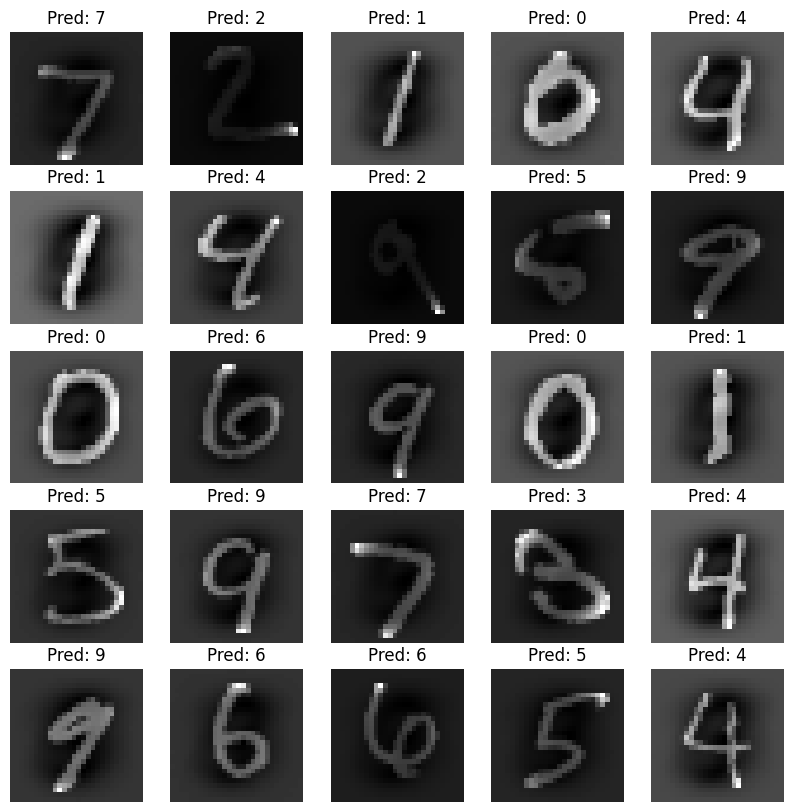

In [13]:
#SVM predictions
plot_predictions(classifiers["SVM"], x_test, y_test)

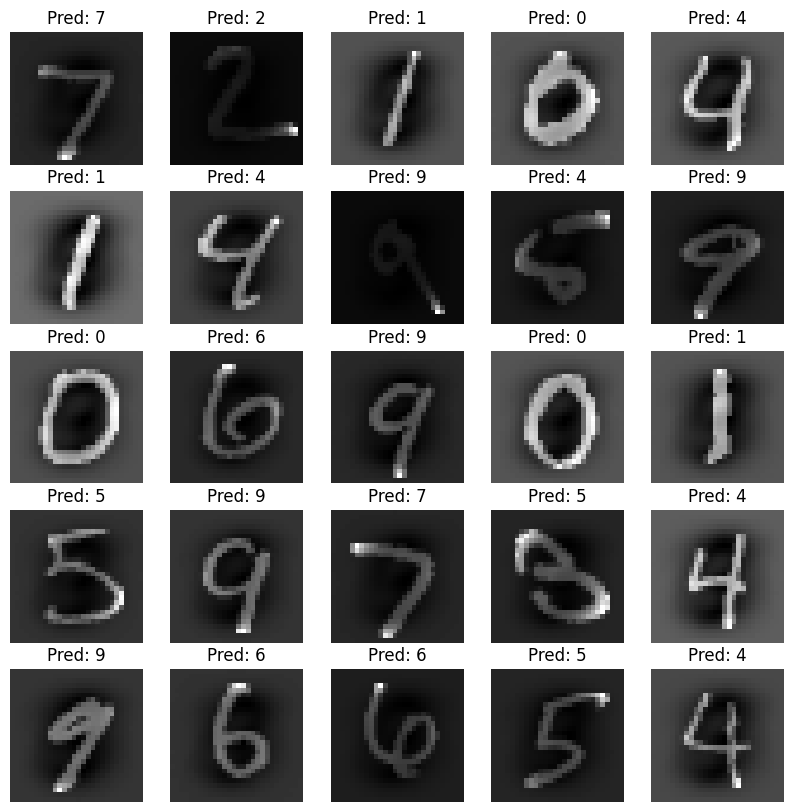

In [14]:
#KNN predictions
plot_predictions(classifiers["KNN"], x_test, y_test)

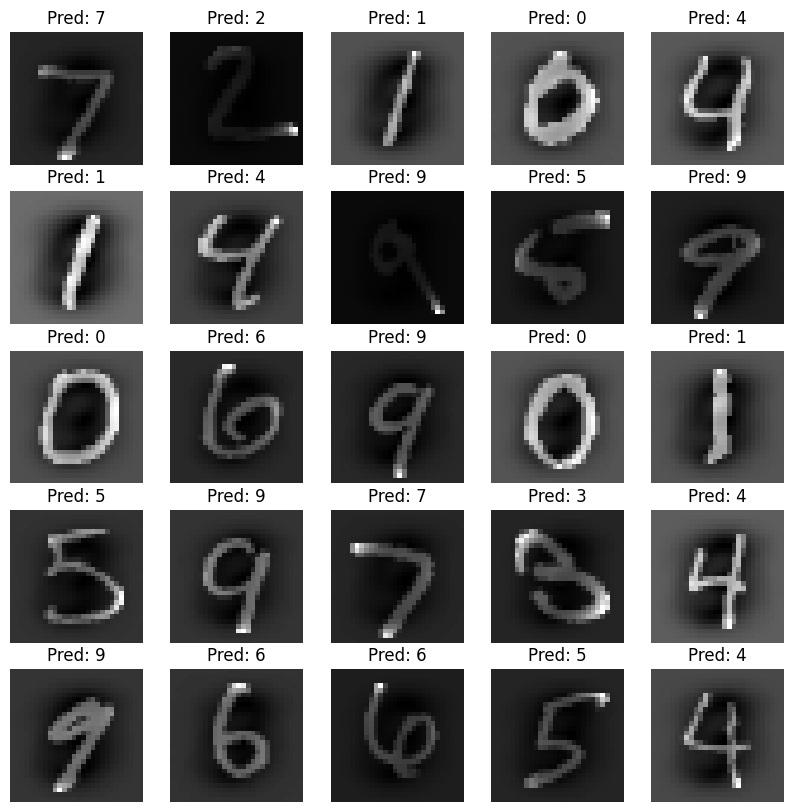

In [17]:
#Random Forest predictions
plot_predictions(classifiers["Random Forest"], x_test, y_test)